In [1]:
import os
import pathlib
import pandas as pd
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [2]:
!pip install ktrain
import ktrain
from ktrain import text
MODEL_NAME="Musixmatch/umberto-wikipedia-uncased-v1"

     |████████████████████████████████| 25.3 MB 271 kB/s eta 0:00:01:00:13
     |████████████████████████████████| 981 kB 47.1 MB/s eta 0:00:01     |██████████████████████████      | 798 kB 47.1 MB/s eta 0:00:01
     |████████████████████████████████| 263 kB 61.6 MB/s eta 0:00:01
     |████████████████████████████████| 468 kB 54.7 MB/s eta 0:00:01
  Created wheel for ktrain: filename=ktrain-0.28.2-py3-none-any.whl size=25290606 sha256=cdead852d01c08eef0599d10b541b8f4f48f4678e5020b47a0aab8cf5d97594a
  Stored in directory: /root/.cache/pip/wheels/df/2b/04/7c821b51e637ec480060989b5030d0c4cce16efe0d67bff94b
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=e06ff3679ec6bda870efd4faa0e58278dd2754111788f9e6592041ce9737f2dd
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff05c722d142b7d20a88ad63f9aab11b895411241a4
  Created wheel for keras-bert: filename=keras_bert-0.88.0-py3-none-any.whl size=34204 sha256=e98f9b125519114b342c2dc530ffee4d8379

In [3]:
train_path= "../input/dati-di-training-e-di-test/haspeede2_dev_taskAB.csv"
test_path="../input/dati-di-training-e-di-test/haspeede2_reference_taskAB-news.csv"
tr_path=pathlib.Path(train_path)
te_path=pathlib.Path(test_path)
if tr_path.exists():
    print("Train data path set.")
else:
    raise SystemExit("Training Data Path does not exist.")

if te_path.exists():
    print("Test data path set.")
else:
    raise SystemExit("Test Data Path does not exist.")

Train data path set.
Test data path set.


In [4]:
train_df= pd.read_csv(train_path, encoding='utf-8', sep="\t", header=None)
train_df=train_df.drop([0])
train_df=train_df.drop([3], axis=1)
train_df.head()

,0,1,2
1,2066,"È terrorismo anche questo, per mettere in uno ...",0
2,2045,@user @user infatti finché ci hanno guadagnato...,0
3,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0
4,1259,"@user ad uno ad uno, perché quando i migranti ...",0
5,949,Il divertimento del giorno? Trovare i patrioti...,0


In [5]:
test_df= pd.read_csv(test_path, encoding='utf-8', sep="\t",header=None)
test_df=test_df.drop([3], axis=1)
test_df.head()

,0,1,2
0,11976,"Andate pure là, tanto quei fessi degli italian...",1
1,12142,Che fine spero che faccia il killer nigeriano ...,1
2,12088,Così i profughi ci svuotano i negozi a Pordenone,1
3,12030,Così umiliano gli italiani e coccolano i cland...,1
4,11775,"Danno soldi ai clandestini, ma ai disabili inv...",1


In [6]:
x_train=train_df[1].tolist()
y_train=train_df[2].tolist()
x_test=test_df[1].tolist()
y_test=test_df[2].tolist()


t=text.Transformer(MODEL_NAME,maxlen=100)
trn=t.preprocess_train(x_train,y_train)
val=t.preprocess_test(x_test,y_test)

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

preprocessing train...
language: it
train sequence lengths:
	mean : 23
	95percentile : 45
	99percentile : 50


Downloading:   0%|          | 0.00/801k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/210 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/309 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: it
test sequence lengths:
	mean : 13
	95percentile : 18
	99percentile : 20


404 Client Error: Not Found for url: https://huggingface.co/Musixmatch/umberto-wikipedia-uncased-v1/resolve/main/tf_model.h5
/opt/conda/lib/python3.7/site-packages/ktrain/text/preprocessor.py:1067: UserWarning: Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn('Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. ' +\


Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
213/213 [==============================] - 101s 382ms/step - loss: 0.6870 - accuracy: 0.5800
Epoch 2/10
213/213 [==============================] - 82s 387ms/step - loss: 0.6744 - accuracy: 0.5950
Epoch 3/10
213/213 [==============================] - 82s 386ms/step - loss: 0.5781 - accuracy: 0.6891
Epoch 4/10
213/213 [==============================] - 82s 385ms/step - loss: 0.4871 - accuracy: 0.7625
Epoch 5/10
213/213 [==============================] - 82s 386ms/step - loss: 0.6693 - accuracy: 0.6013
Epoch 6/10
213/213 [==============================] - 82s 385ms/step - loss: 0.6859 - accuracy: 0.5787
Epoch 7/10
213/213 [==============================] - 79s 372ms/step - loss: 2.4913 - accuracy: 0.5366


done.
Visually inspect loss plot and select learning rate associated with falling loss


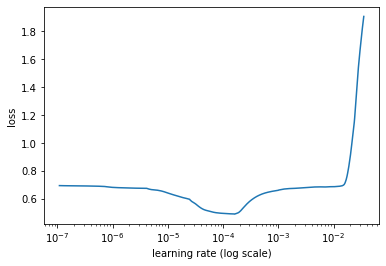



begin training using triangular learning rate policy with max lr of 0.0002...
Epoch 1/10
214/214 [==============================] - 101s 401ms/step - loss: 0.6266 - accuracy: 0.6351 - val_loss: 0.6379 - val_accuracy: 0.7420
Epoch 2/10
214/214 [==============================] - 84s 388ms/step - loss: 0.6219 - accuracy: 0.6440 - val_loss: 0.6560 - val_accuracy: 0.6380
Epoch 3/10
214/214 [==============================] - 84s 387ms/step - loss: 0.6779 - accuracy: 0.5935 - val_loss: 0.6611 - val_accuracy: 0.6380
Epoch 4/10
214/214 [==============================] - 84s 388ms/step - loss: 0.6768 - accuracy: 0.5938 - val_loss: 0.6641 - val_accuracy: 0.6380
Epoch 5/10
214/214 [==============================] - 84s 388ms/step - loss: 0.6769 - accuracy: 0.5954 - val_loss: 0.6562 - val_accuracy: 0.6380
Epoch 6/10
214/214 [==============================] - 84s 387ms/step - loss: 0.6768 - accuracy: 0.5954 - val_loss: 0.6585 - val_accuracy: 0.6380
Restoring model weights from the end of the best 

array([[296,  23],
       [106,  75]])

In [7]:
model=t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

learner.lr_find(show_plot=True,max_epochs=10)
learner.autofit(2e-4,early_stopping=5,epochs=10)
learner.validate(class_names=t.get_classes())

In [8]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

data=test_df[1].tolist()
label=test_df[2].tolist()

i = 0
correct = 0
wrong = 0
total = len(data)
true_lab = []
pred_lab = []
text = []
for dt in data:
    result = predictor.predict(dt)
    if not int(result) == label[i]:
        text.append(dt)
        pred_lab.append(result)
        true_lab.append(label[i])
        wrong += 1
    else:
        correct += 1

    i += 1

name_dict = {
    'Name': text,
    'Gold Label': true_lab,
    'Predicted Label': pred_lab
}

wrong_data = pd.DataFrame(name_dict)

wrong_data.to_csv("wrong_results.csv", sep=';')

print("Correct: ", correct,"/",total,"\nWrong: ", wrong,"/",total)

Correct:  371 / 500 
Wrong:  129 / 500
